# **B Corps Exploration** #

The goal of this project is to explore the B Corporation reality around the world with a special focus on Europe and France. I will answer some questions such as:

- What is the distribution of B Corps around the world, in Europe, and in France?
- Which sectors have the most B Corps?
- Is there any correlation between the number of B Corps in a country and its GDP per capita or CO2 emissions?
- In which categories are B Corps evaluated?
- Which companies are the most exemplary?

There will be three parts:
1) World
2) Europe
3) France

I will use Python to manipulate and visualize the data. 

In [2265]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## **World** ##

In [2266]:
# Reading in the data
bcorps = pd.read_csv('bcorps.csv')

# Looking at the data
bcorps.head()

,Name,Headquarters,Certified Since,Industry,Sector,Operates In,Country,URL,Overall B Impact Score,Subscore - Governance,Subscore - Workers,Subscore - Community,Subscore - Environment,Subscore - Customers
0,Dr. Bronner's,"California , United States",septembre 2015,Personal care products,Manufacturing,"Germany, United States",United States,https://www.bcorporation.net/en-us/find-a-b-co...,206.7,15.3,28.6,83.3,75.3,4.0
1,Global Prairie,"Missouri , United States",mars 2015,Advertising & market research,Service with Minor Environmental Footprint,"Belgium, Germany, Spain, United States",United States,https://www.bcorporation.net/en-us/find-a-b-co...,192.9,24.3,71.6,48.3,16.1,32.4
2,"South Mountain Company, Inc.","Massachusetts , United States",juin 2008,Design & building,Service with Significant Environmental Footprint,United States,United States,https://www.bcorporation.net/en-us/find-a-b-co...,189.4,17.8,61.5,59.9,48.2,1.8
3,Falling Colors,"New Mexico , United States",avril 2020,Data processing & hosting,Service with Minor Environmental Footprint,United States,United States,https://www.bcorporation.net/en-us/find-a-b-co...,181.5,22.8,45.9,53.5,7.0,52.1
4,African Clean Energy BV,"North Holland , Netherlands The",février 2018,Solar power generation,Manufacturing,"Cambodia, Kenya, Lesotho, Netherlands The, Sou...",Netherlands,https://www.bcorporation.net/en-us/find-a-b-co...,179.8,13.0,60.3,17.2,27.7,61.5


### **Data cleaning** ###

In [2267]:
# Checking for missing data

percent_missing = bcorps.isnull().sum() * 100 / len(bcorps)
print(percent_missing)

Name                      0.000000
Headquarters              5.351619
Certified Since           0.000000
Industry                  0.000000
Sector                    0.000000
Operates In               0.000000
Country                   0.000000
URL                       0.000000
Overall B Impact Score    0.000000
Subscore - Governance     0.000000
Subscore - Workers        6.836461
Subscore - Community      0.000000
Subscore - Environment    0.000000
Subscore - Customers      0.030934
dtype: float64


*I decide to keep the missing data because irrilevant for now*

In [2268]:
# Checking for duplicates

duplicates = bcorps[bcorps.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Name, Headquarters, Certified Since, Industry, Sector, Operates In, Country, URL, Overall B Impact Score, Subscore - Governance, Subscore - Workers, Subscore - Community, Subscore - Environment, Subscore - Customers]
Index: []


In [2269]:
# Checking the data type of columns

print(bcorps.dtypes)

Name                       object
Headquarters               object
Certified Since            object
Industry                   object
Sector                     object
Operates In                object
Country                    object
URL                        object
Overall B Impact Score    float64
Subscore - Governance     float64
Subscore - Workers        float64
Subscore - Community      float64
Subscore - Environment    float64
Subscore - Customers      float64
dtype: object


### **Data exploration** ###

In [ ]:
# Visualizing the distribution of B Corps around the world

# Calculating the percentage of B Corps per country
bcorps_grouped = bcorps.groupby('Country').size().reset_index(name='industry_count')
bcorps_grouped['percent_total'] = (
    bcorps_grouped['industry_count'] / bcorps_grouped['industry_count'].sum() * 100
).round(2)  # round to two decimal places

fig = px.choropleth(
    bcorps_grouped,
    locations='Country',           
    locationmode='country names',
    color='industry_count',        
    color_continuous_scale='Greens',
    title='B Corps distribution',
    hover_name='Country',
    labels={'industry_count': 'B Corps'},
    hover_data={
    'industry_count': True,
    'percent_total': ':.2f',
    'Country': False
    }
)

fig.update_layout(font_family="Georgia",)

fig.show()

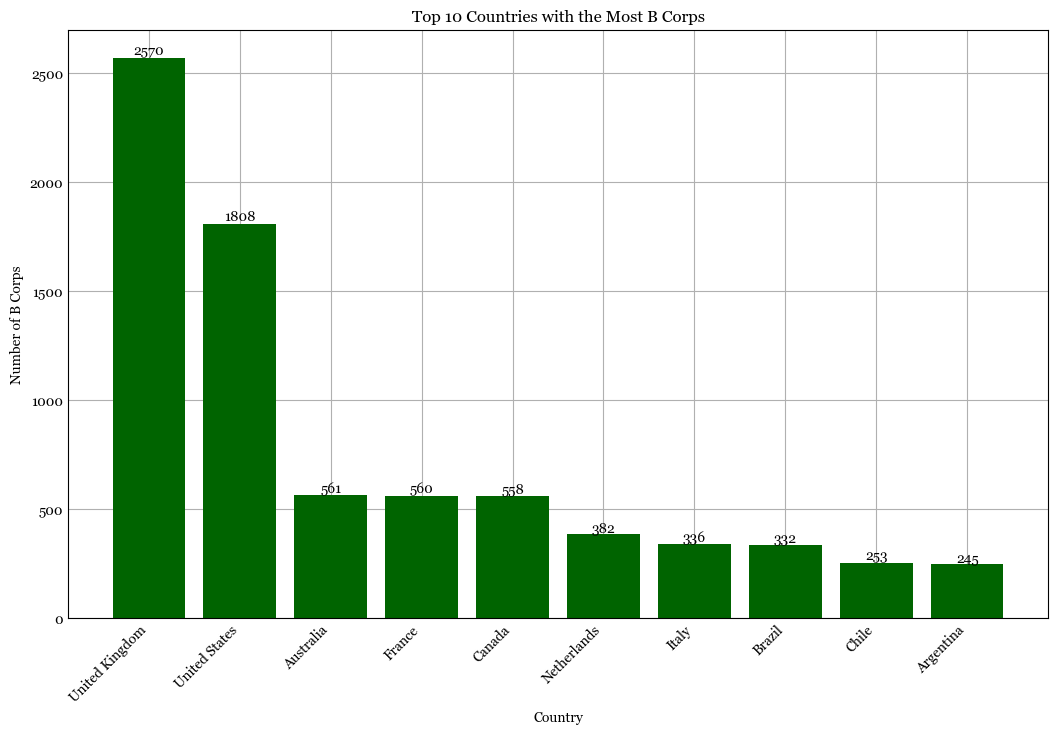

In [2271]:
# Visualizing top 10 countries by number of B Corps

# Calculating top 10 countries with the most B Corps
top_countries = bcorps.groupby('Country').size().sort_values(ascending=False).head(10)

x = np.arange(len(top_countries))
y = top_countries.values

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x, y)

# Setting x ticks and labels with rotation and right alignment
ax.set_xticks(x)
ax.set_xticklabels(top_countries.index, rotation=45, ha='right')

# Adding numeric labels above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
        str(int(height)), ha='center', va='bottom')

# Setting axis labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Number of B Corps')
ax.set_title('Top 10 Countries with the Most B Corps')

# Changing the color
plt.bar(x, y, color = "DarkGreen")

plt.show()


*The United Kingdom and the United States lead with the highest number of B Corps, highlighting a strong commitment to sustainable business in these countries.*

In [2335]:
# Visualizing distribution by sector


# Calculating sector counts and percentages
sector_counts = bcorps['Sector'].value_counts()
sector_percentages = 100 * sector_counts / sector_counts.sum()

# Mapping sectors to numeric indices for coloring
unique_sectors = sector_percentages.index.tolist()
sector_color_indices = [unique_sectors.index(s) for s in sector_percentages.index]

fig = go.Figure(data=[go.Scatter(
    x=sector_percentages.index,
    y=sector_percentages.values,
    mode='markers',
    marker=dict(
        size=sector_percentages.values * 3,
        color=sector_color_indices,
        colorscale='Greens_r',
        showscale=True,
        colorbar=dict(title='Sector')
    )    
)])

fig.update_layout(
    xaxis=dict(title='Sector', showgrid=False),
    yaxis=dict(title='Percentage (%)', showgrid=False),
    font=dict(family="Georgia", color="green"),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    width=900,
    height=600
)

fig.update_traces(
    hovertemplate='%{x}: %{y:.2f} %<extra></extra>'
)

fig.show()

### **Importing and cleaning the gdp table to see the correlation between GDP per capita and number of B Corps** ###

In [2273]:
# Reading in the data
gdp = pd.read_csv('gdp.csv')

# Looking at the data
gdp.head()

,Country Name,Country Code,2022,2023,2024
0,Aruba,ABW,30559.533530,33984.790620,NaN
1,Africa Eastern and Southern,AFE,1628.318944,1568.159891,1673.841139
2,Afghanistan,AFG,357.261153,413.757895,NaN
3,Africa Western and Central,AFW,1796.668633,1599.392983,1284.154441
4,Angola,AGO,2929.694455,2309.534130,2122.083690


In [2274]:
# Checking for duplicates

duplicates = gdp[gdp.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Country Name, Country Code, 2022, 2023, 2024]
Index: []


In [2275]:
# Checking the data type of columns

print(gdp.dtypes)

Country Name     object
Country Code     object
2022            float64
2023            float64
2024            float64
dtype: object


In [2276]:
# Checking for missing data

percent_missing = gdp.isnull().sum() * 100 / len(gdp)
print(percent_missing)

Country Name     0.000000
Country Code     0.000000
2022             3.383459
2023             6.390977
2024            12.781955
dtype: float64


In [2277]:
# Creating a new column: take value from 2024, else 2023, else 2022

gdp['GDP_latest'] = gdp['2024'].fillna(gdp['2023']).fillna(gdp['2022'])
gdp.head()

,Country Name,Country Code,2022,2023,2024,GDP_latest
0,Aruba,ABW,30559.533530,33984.790620,NaN,33984.790620
1,Africa Eastern and Southern,AFE,1628.318944,1568.159891,1673.841139,1673.841139
2,Afghanistan,AFG,357.261153,413.757895,NaN,413.757895
3,Africa Western and Central,AFW,1796.668633,1599.392983,1284.154441,1284.154441
4,Angola,AGO,2929.694455,2309.534130,2122.083690,2122.083690


In [2278]:
# Creating a new dataframe with Country Name, number of B Corps per country and GDP

# Step 1: Counting B Corps per country
bcorps_counts = bcorps.groupby('Country').size().reset_index(name='B Corps Count')

# Step 2: Merging with gdp
bcorps_gdp = bcorps_counts.merge(
    gdp[['Country Name', 'GDP_latest']], 
    left_on='Country', 
    right_on='Country Name', 
    how='left'
)

bcorps_gdp = bcorps_gdp.drop(columns=['Country Name'])

bcorps_gdp.head()

,Country,B Corps Count,GDP_latest
0,Afghanistan,1,413.757895
1,Albania,1,10011.627990
2,Algeria,1,5631.179991
3,Argentina,245,13858.203980
4,Australia,561,64407.484260


In [2279]:
# Checking the data type of columns

print(bcorps_gdp.dtypes)

Country           object
B Corps Count      int64
GDP_latest       float64
dtype: object


<Axes: >

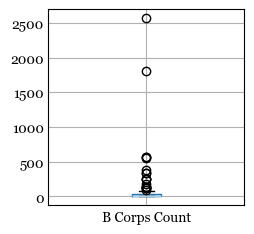

In [2280]:
# Checking outliers on B Corps Count column

bcorps_gdp.boxplot(column=["B Corps Count"])

In [2281]:
# Removing outliers

# Compute the z-scores for the "B Corps Count" column
z_scores = stats.zscore(bcorps_gdp['B Corps Count'])

# Take the absolute value of z-scores
abs_z_scores = np.abs(z_scores)

# Keep only entries where |z| < 3 (i.e., non-outliers)
filtered_entries = (abs_z_scores < 3)

# Update the DataFrame by removing outliers
bcorps_gdp = bcorps_gdp[filtered_entries]


<Axes: >

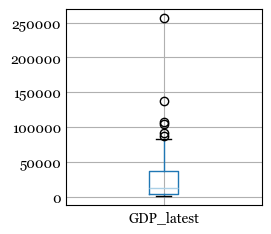

In [2282]:
# Checking outliers on GDP_latest column

bcorps_gdp.boxplot(column=["GDP_latest"])

In [2283]:
# Removing outliers

# Calculating the z-scores for the "GDP_latest" column
z_scores = stats.zscore(bcorps_gdp['GDP_latest'].dropna())

# Taking the absolute value of z-scores
abs_z_scores = np.abs(z_scores)

# Keeping only entries where |z| < 3 (i.e., non-outliers)
filtered_indices = abs_z_scores < 3

# Applying the filter to the DataFrame while preserving the corresponding indices
bcorps_gdp_filtered = bcorps_gdp.loc[bcorps_gdp['GDP_latest'].dropna().index[filtered_indices]]

bcorps_gdp = bcorps_gdp_filtered


### **Data exploration** ###

Text(0, 0.5, 'Number of B Corps')

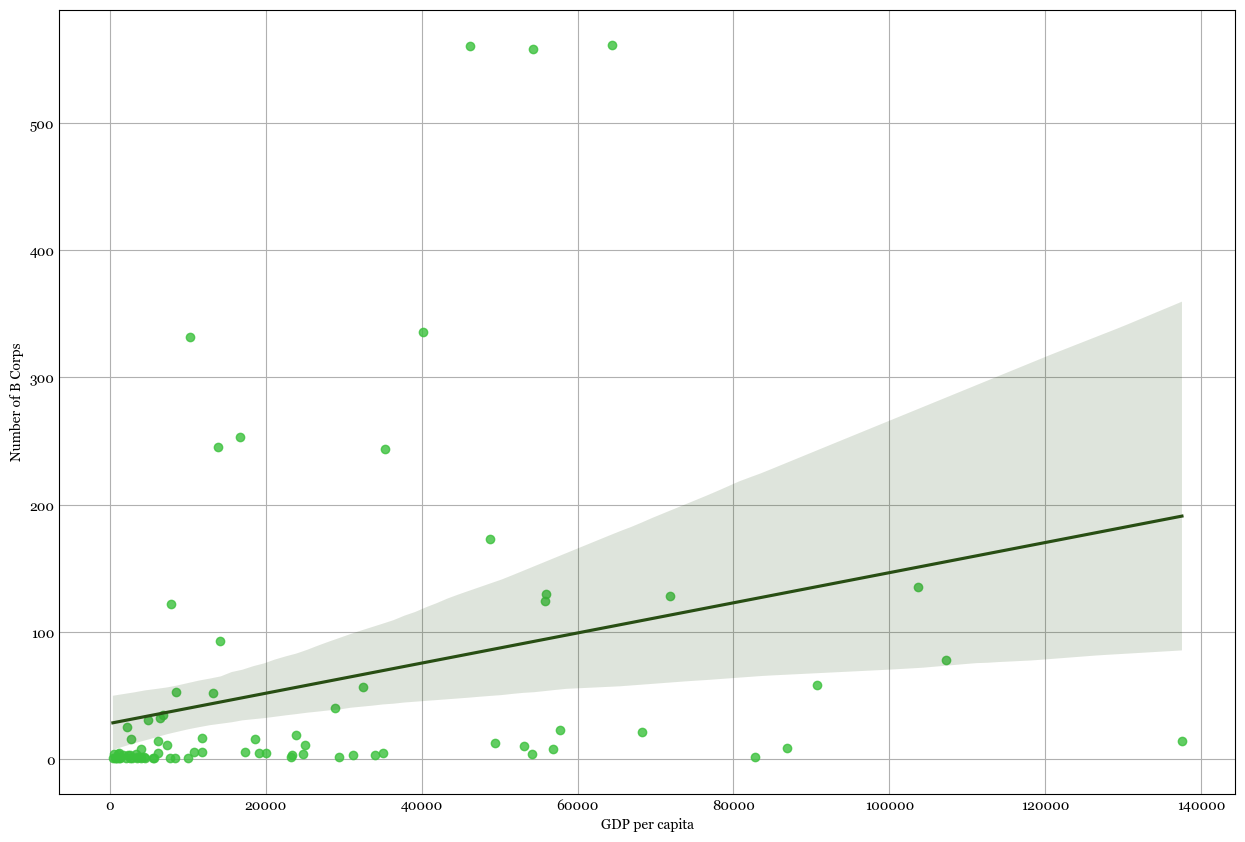

In [2284]:
# Viusualizing the correlation between number of B Corps in a country and its GDP per capita

plt.figure(figsize=(12, 8))
ax = sns.regplot(x="GDP_latest", y="B Corps Count", data=bcorps_gdp, scatter_kws= {"color":"#3bc13cff"}, line_kws= {"color": "#284e14ff"})

ax.set_xlabel("GDP per capita")
ax.set_ylabel("Number of B Corps")

In [2285]:
# Calculating the correlation coefficient

corr_coeff = bcorps_gdp['GDP_latest'].corr(bcorps_gdp['B Corps Count'])
formatted = f"{corr_coeff:.2}".replace('.', ',') 
print(f"Pearson correlation coefficient: {formatted}")

Pearson correlation coefficient: 0,28


*There's a link between the number of B Corps and how rich a country is, but it's not a strong one. A country's wealth only tells part of the story about how many B Corps it has. Wealthier countries usually have more B Corps, but other things matter too, like government rules, how people feel about starting businesses, and how well-known the B Corp label is. The numbers show a mild relationship (0.30). Some rich countries have lots of B Corps, but not always, and some middle-income countries have quite a few.*

***About GDP per capita:***

*Nominal gross domestic product (GDP) per capita is the total value of a country's finished goods and services (gross domestic product) divided by its total population (per capita). Gross domestic product per capita is often used as a proxy indicator an indicator of a country's standard of living; however, this is inaccurate because GDP per capita is not a measure of personal income and does not take into account social and environmental costs and benefits. Measures of personal income include average wage, real income, median income, disposable income and gross national income (GNI) per capita.*


### **Importing and cleaning the co2 table to see the correlation between co2 emissions and number of B Corps** ###

In [2286]:
# Reading in the data
co2 = pd.read_csv('co2.csv')

# Looking at the data
co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,2023,0.27
1,Africa,2023,0.96
2,Albania,2023,1.83
3,Algeria,2023,3.86
4,Andorra,2023,5.24


In [2287]:
# Checking for duplicates

duplicates = co2[co2.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Entity, Year, Annual CO₂ emissions (per capita)]
Index: []


In [2288]:
# Checking for missing data

percent_missing = co2.isnull().sum() * 100 / len(co2)
print(percent_missing)

Entity                               0.0000
Year                                 0.0000
Annual CO₂ emissions (per capita)    0.4329
dtype: float64


In [2289]:
# Checking the data type of columns

print(co2.dtypes)

Entity                                object
Year                                   int64
Annual CO₂ emissions (per capita)    float64
dtype: object


In [2290]:
# Creating a new dataframe with Country Name, number of B Corps per country and CO2

# Merge the bcorps_counts df created before with co2
bcorps_co2 = bcorps_counts.merge(
    co2[['Entity', 'Annual CO₂ emissions (per capita)']],
    left_on='Country',
    right_on='Entity',
    how='left'
)

bcorps_co2 = bcorps_co2.drop(columns=['Entity'])

bcorps_co2.head()

,Country,B Corps Count,Annual CO₂ emissions (per capita)
0,Afghanistan,1,0.27
1,Albania,1,1.83
2,Algeria,1,3.86
3,Argentina,245,4.30
4,Australia,561,14.48


In [2291]:
# Checking the data type of columns

print(bcorps_co2.dtypes)

Country                               object
B Corps Count                          int64
Annual CO₂ emissions (per capita)    float64
dtype: object


<Axes: >

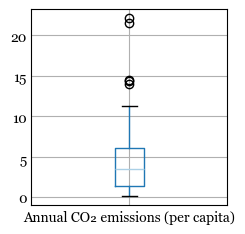

In [2292]:
# Checking outliers on Annual CO₂ emissions (per capita) column

bcorps_co2.boxplot(column=["Annual CO₂ emissions (per capita)"])

In [2293]:
# Removing outliers

# Calculating the z-scores for the "B Corps Count" column
z_scores = stats.zscore(bcorps_co2["Annual CO₂ emissions (per capita)"].dropna())

# Taking the absolute value of z-scores
abs_z_scores = np.abs(z_scores)

# Keeping only entries where |z| < 3 (i.e., non-outliers)
filtered_indices = abs_z_scores < 3

# Applying the filter to the DataFrame while preserving the corresponding indices
bcorps_co2_filtered = bcorps_co2.loc[bcorps_co2['Annual CO₂ emissions (per capita)'].dropna().index[filtered_indices]]

bcorps_co2 = bcorps_co2_filtered


### **Data visualization** ###

Text(24.0, 0.5, 'Number of B Corps')

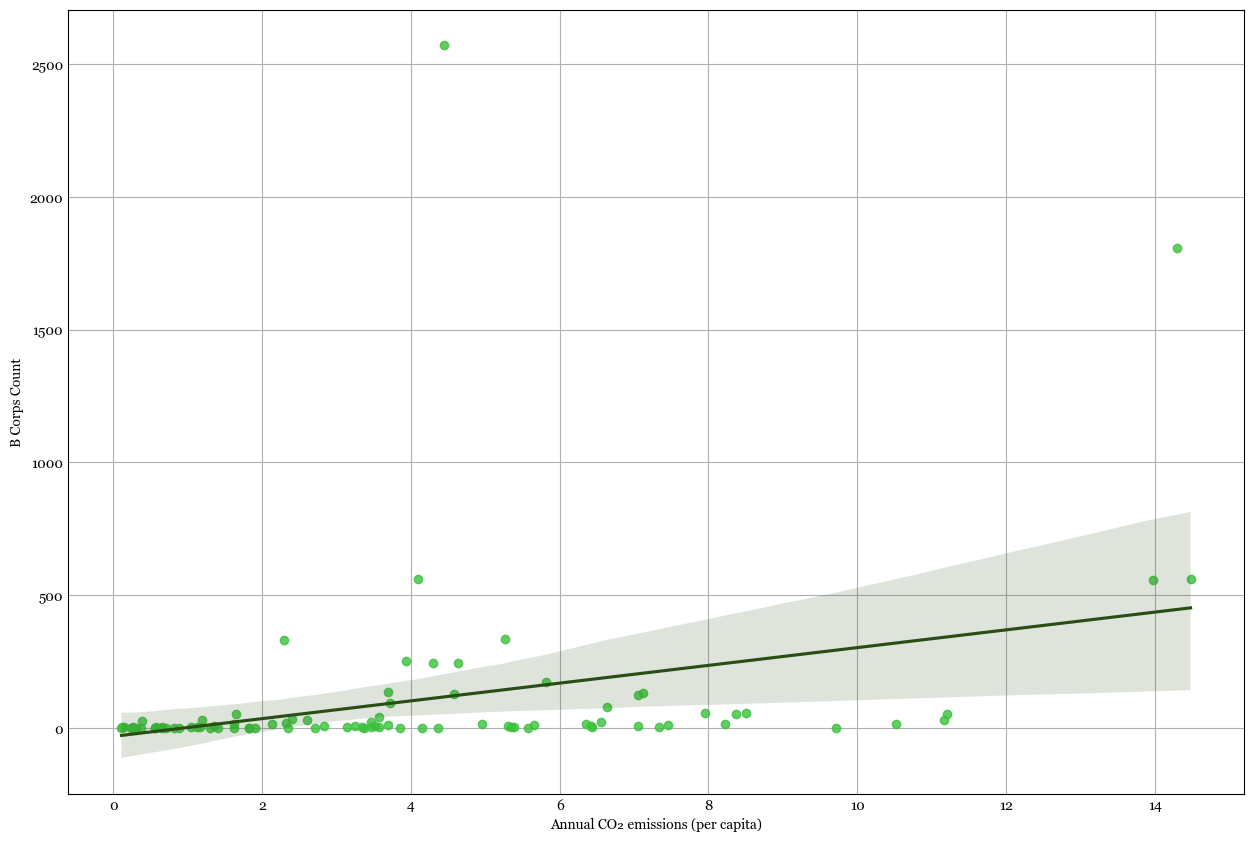

In [2294]:
# Visualizing the correlation between number of B Corps in a country and its CO2 emissions

plt.figure(figsize=(12, 8))
sns.regplot(x="Annual CO₂ emissions (per capita)", y="B Corps Count", data=bcorps_co2, scatter_kws= {"color":"#3bc13cff"}, line_kws= {"color": "#284e14ff"})

ax.set_xlabel("Annual CO₂ emissions (per capita)")
ax.set_ylabel("Number of B Corps")

In [2295]:
# Calculating the correlation coefficient

corr_coeff = bcorps_co2['Annual CO₂ emissions (per capita)'].corr(bcorps_co2['B Corps Count'])
formatted = f"{corr_coeff:.2}".replace('.', ',') 
print(f"Pearson correlation coefficient: {formatted}")

Pearson correlation coefficient: 0,33


*Moderate positive relationship between the number of B Corps in a country and its CO2 emissions per capita. As CO2 emissions increase, the number of B Corps tends to increase as well, but the correlation is not very strong.*

### **Importing and cleaning the epi table to see the correlation between epi and environment score** ###

In [2296]:
# Reading in the data
epi = pd.read_csv('epi.csv')

# Looking at the data
epi.head()

,iso,country,EPI
0,AFG,Afghanistan,31.0
1,ALB,Albania,52.2
2,DZA,Algeria,41.7
3,AGO,Angola,40.1
4,ATG,Antigua and Barbuda,55.6


In [2297]:
# Checking for duplicates

duplicates = epi[epi.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [iso, country, EPI]
Index: []


In [2298]:
# Checking for missing data

percent_missing = epi.isnull().sum() * 100 / len(epi)
print(percent_missing)

iso        0.0
country    0.0
EPI        0.0
dtype: float64


In [2299]:
# Checking the data type of columns

print(epi.dtypes)

iso         object
country     object
EPI        float64
dtype: object


In [2300]:
# Creating a new dataframe with Country Name, average environment rate per country and EPI

# Step 1: Calculating the average environment score per country
env_score = bcorps.groupby('Country')['Subscore - Environment'].mean().reset_index(name='env_score')

# Step 2: Merging with epi
bcorps_epi = env_score.merge(
    epi[['country', 'EPI']],
    left_on = 'Country',
    right_on='country',
    how='left'
)

bcorps_epi = bcorps_epi.drop(columns=['country'])

bcorps_epi.head()

,Country,env_score,EPI
0,Afghanistan,18.400000,31.0
1,Albania,11.300000,52.2
2,Algeria,15.700000,41.7
3,Argentina,19.677143,47.0
4,Australia,17.714617,63.1


In [2301]:
# Checking the data type of columns

print(bcorps_epi.dtypes)

Country       object
env_score    float64
EPI          float64
dtype: object


<Axes: >

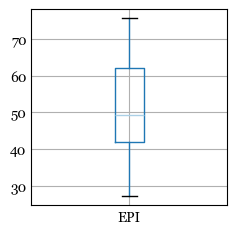

In [2302]:
# Checking outliers on EPI column

bcorps_epi.boxplot(column=["EPI"])

*No outlier*

### **Data visualization** ###

Text(24.0, 0.5, 'Environment score average per country')

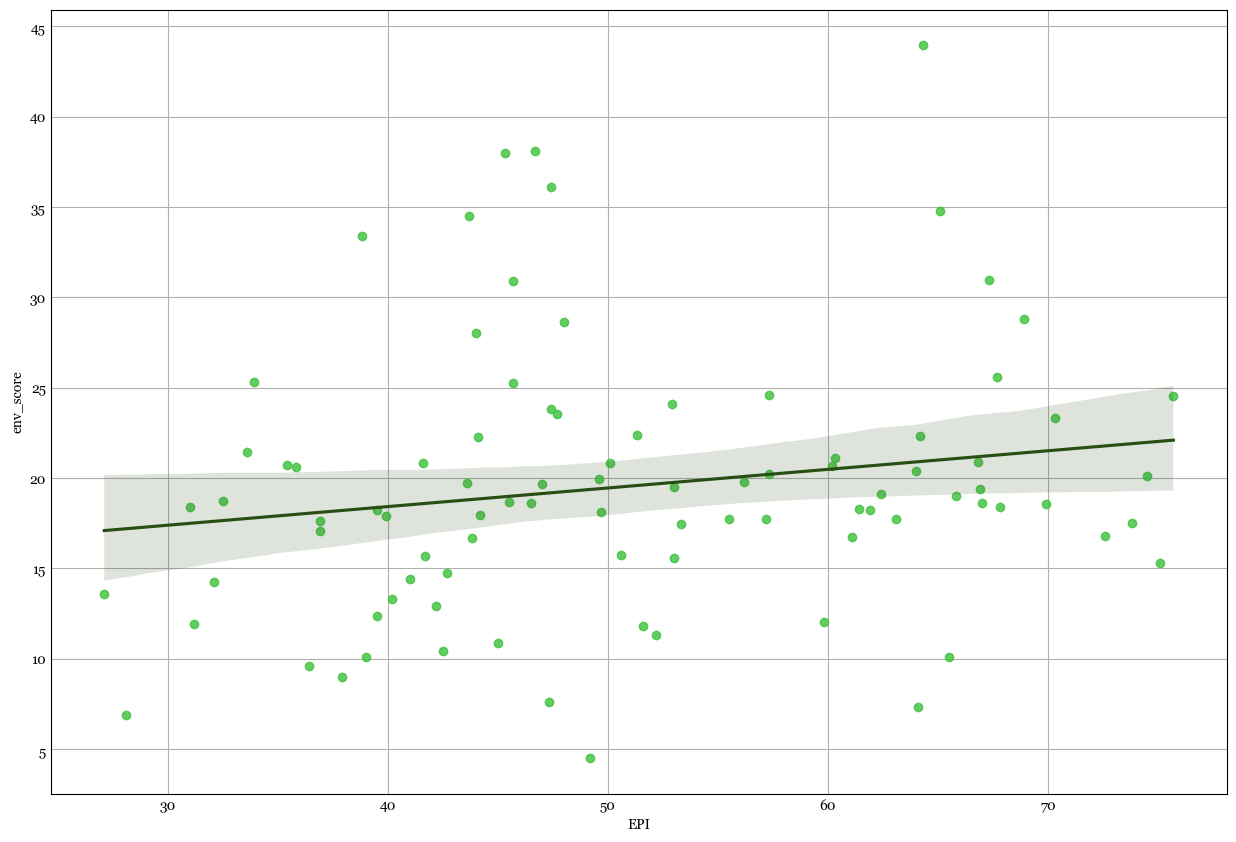

In [2303]:
# Visualizing correlation between the average of the environment score and the EPI

plt.figure(figsize=(12, 8))
sns.regplot(x="EPI", y="env_score", data=bcorps_epi, scatter_kws= {"color":"#3bc13cff"}, line_kws= {"color": "#284e14ff"})

ax.set_xlabel("Epi score")
ax.set_ylabel("Environment score average per country")

In [2304]:
# Calculating the correlation coefficient
corr_coeff = bcorps_epi['EPI'].corr(bcorps_epi['env_score'])
formatted = f"{corr_coeff:.2}".replace('.', ',') 
print(f"Pearson correlation coefficient: {formatted}")

Pearson correlation coefficient: 0,18


*There is a very weak positive linear relationship. This means the two measures slightly increase together, but the association is practically negligible and lacks strong predictive or practical significance.*

***About the EPI score:***

*The Environmental Performance Index (EPI) provides a data-driven summary of the state of sustainability around the world. Using 58 performance indicators across 11 issue categories, the EPI ranks 180 countries on climate change performance, environmental health, and ecosystem vitality. These indicators provide a gauge at a national scale of how close countries are to established environmental policy targets. The EPI offers a scorecard that highlights leaders and laggards in environmental performance and provides practical guidance for countries that aspire to move toward a sustainable future.*

## **Europe** ##

In [2305]:
 # Visualizing the distribution of B Corps in Europe

fig = px.choropleth(
    bcorps_grouped,
    locations='Country',           
    locationmode='country names',  # Plotly can recognize country names
    color='industry_count',        
    color_continuous_scale='Greens',
    title='B Corps distribution',
    hover_name='Country',          # display country name on hover"
    scope='europe',                # display only Europe
    labels={'industry_count': 'B Corps'},
     hover_data={
    'industry_count': True,                # Show the absolute number
    'percent_total': ':.2f',               # Show the percentage with two decimal places
    'Country': False                       # Avoid duplicate country name
    }
)

fig.update_layout(font_family="Georgia",)

fig.show()

### **Importing and cleaning the Eu Business Demography to calculate the ratio of B Corps on the total of companies** ###

In [2306]:
# Importing and looking at the Eu Business Demography table

# Reading in the data
eu_dem = pd.read_csv('eu_business_demography.csv')

# Looking at the data
eu_dem.head()

,Country,Companies
0,Belgium,888 925
1,Bulgaria,394 135
2,Czechia,1 292 436
3,Denmark,380 208
4,Germany,3 164 855


In [2307]:
# Checking for duplicates

duplicates = eu_dem[eu_dem.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Country, Companies]
Index: []


In [2308]:
# Checking for missing data

percent_missing = eu_dem.isnull().sum() * 100 / len(eu_dem)
print(percent_missing)

Country      0.0
Companies    0.0
dtype: float64


In [2309]:
# Checking the data type of columns

print(eu_dem.dtypes)

Country      object
Companies    object
dtype: object


In [2310]:
# Checking unique values that might cause issues before converting

print(eu_dem['Companies'].unique())

['888\u202f925' '394\u202f135' '1\u202f292\u202f436' '380\u202f208'
 '3\u202f164\u202f855' '153\u202f907' '389\u202f654' '917\u202f441'
 '3\u202f487\u202f503' '5\u202f202\u202f687' '227\u202f408'
 '4\u202f579\u202f525' '87\u202f707' '145\u202f441' '329\u202f361'
 '45\u202f021' '976\u202f964' '51\u202f506' '2\u202f204\u202f281'
 '583\u202f947' '2\u202f675\u202f865' '1\u202f329\u202f175' '974\u202f968'
 '194\u202f876' '635\u202f781' '442\u202f264' '835\u202f543' '44\u202f981'
 '66\u202f577' '205\u202f316' '3\u202f806\u202f819']


In [2311]:
# Removing the special non-breaking spaces from the strings

eu_dem['Companies'] = eu_dem['Companies'].str.replace('\u202f', '', regex=False)

In [2312]:
# Converting to integer

eu_dem['Companies'] = pd.to_numeric(eu_dem['Companies'], errors='coerce').astype('Int64')
eu_dem.head()


,Country,Companies
0,Belgium,888925
1,Bulgaria,394135
2,Czechia,1292436
3,Denmark,380208
4,Germany,3164855


In [2313]:
# Checking the result

print(eu_dem[eu_dem['Companies'].isna()])
print(eu_dem['Companies'].dtype)


Empty DataFrame
Columns: [Country, Companies]
Index: []
Int64


In [2314]:
# Creating a new dataframe with Country Name, number of B Corps per country and number of companies

# Merging the bcorps_counts df created before with number of companies in Europe
b_corps_eu_dem = bcorps_counts.merge(
    eu_dem[['Country', 'Companies']],
    left_on='Country',
    right_on='Country',
    how='right'
)

# Keeping only countries with B Corps
b_corps_eu_dem = b_corps_eu_dem[b_corps_eu_dem['B Corps Count'].notna()]

print(b_corps_eu_dem)

        Country  B Corps Count  Companies
0       Belgium          130.0     888925
1      Bulgaria            6.0     394135
3       Denmark          128.0     380208
4       Germany          124.0    3164855
5       Estonia            3.0     153907
6       Ireland           78.0     389654
7        Greece            4.0     917441
8         Spain          244.0    3487503
9        France          560.0    5202687
11        Italy          336.0    4579525
13       Latvia            3.0     145441
14    Lithuania            2.0     329361
15   Luxembourg           14.0      45021
16      Hungary            2.0     976964
18  Netherlands          382.0    2204281
19      Austria            8.0     583947
20       Poland           11.0    2675865
21     Portugal           40.0    1329175
22      Romania            5.0     974968
23     Slovenia            3.0     194876
24     Slovakia            1.0     635781
25      Finland           10.0     442264
26       Sweden           23.0    

In [2315]:
# Calculating the ratio of B Corps to total companies

# Multiplying by 10000 instead of 100 to better visualize small percentages
b_corps_eu_dem['Ratio'] = (b_corps_eu_dem['B Corps Count'] / b_corps_eu_dem['Companies']) * 10000

# Round the results to 2 decimal places for clarity
b_corps_eu_dem['Ratio'] = b_corps_eu_dem['Ratio'].round(2)

# Show the result
print(b_corps_eu_dem[['Country', 'Ratio']].head(30))



        Country  Ratio
0       Belgium   1.46
1      Bulgaria   0.15
3       Denmark   3.37
4       Germany   0.39
5       Estonia   0.19
6       Ireland    2.0
7        Greece   0.04
8         Spain    0.7
9        France   1.08
11        Italy   0.73
13       Latvia   0.21
14    Lithuania   0.06
15   Luxembourg   3.11
16      Hungary   0.02
18  Netherlands   1.73
19      Austria   0.14
20       Poland   0.04
21     Portugal    0.3
22      Romania   0.05
23     Slovenia   0.15
24     Slovakia   0.02
25      Finland   0.23
26       Sweden   0.28
27      Iceland   0.44


### **Data visualization** ###

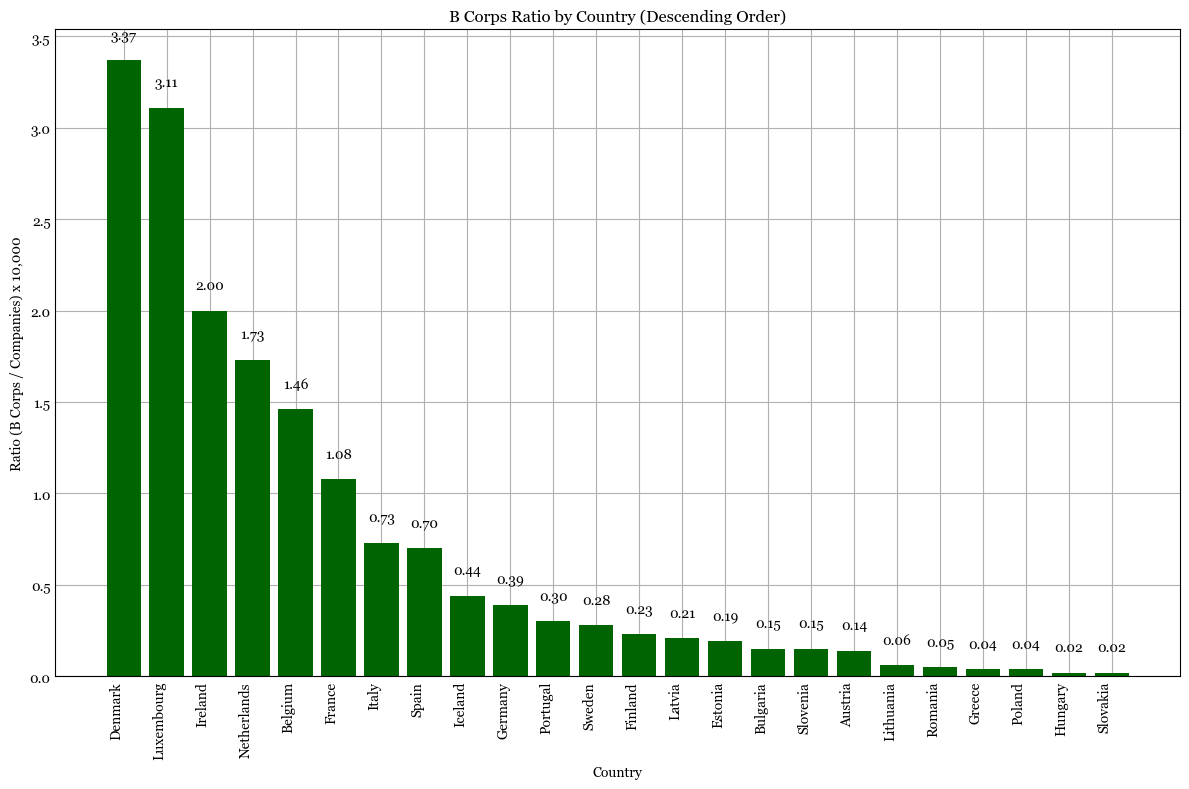

In [2316]:
# Visualizing the plot of the ratio

# Sorting the DataFrame by 'Ratio' in descending order
b_corps_eu_dem_sorted = b_corps_eu_dem.sort_values(by='Ratio', ascending=False)

x = np.arange(len(b_corps_eu_dem_sorted))
y = b_corps_eu_dem_sorted['Ratio'].values

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(x, y)

# Setting x ticks and labels with rotation and right alignment
ax.set_xticks(x)
ax.set_xticklabels(b_corps_eu_dem_sorted['Country'], rotation=90, ha='right')

# Adding numeric labels above each bar with 2 decimals
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, 
            f"{height:.2f}", ha='center', va='bottom')

# Set axis labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Ratio (B Corps / Companies) x 10,000')
ax.set_title('B Corps Ratio by Country (Descending Order)')

# Adjust layout for better fit
plt.tight_layout()

# Changing the color
plt.bar(x, y, color = "DarkGreen")

plt.show()

In [2317]:
# Visualizing european countries by score


# Filtering on european countries
european_countries = [
    "France", "Germany", "Italy", "Spain", "United Kingdom", "Netherlands",
    "Belgium", "Sweden", "Norway", "Denmark", "Finland", "Poland", "Portugal",
    "Greece", "Austria", "Ireland", "Czech Republic", "Hungary", "Switzerland",
    "Slovakia", "Slovenia", "Croatia", "Estonia", "Latvia", "Lithuania", "Bulgaria",
    "Iceland", "Denmark", "Switzerland", "Luxembourg", "Ireland", "Norway", "Monaco",
    "Sweden", "Romania"
]
bcorps_europe = bcorps[bcorps['Country'].isin(european_countries)]

# Calculating mean per country for each subscore
means_df = bcorps_europe.groupby('Country')[
    [
        "Subscore - Governance",
        "Subscore - Workers",
        "Subscore - Community",
        "Subscore - Environment",
        "Subscore - Customers"
    ]
].mean()

# Calculating total score for sorting
means_df['Total'] = means_df.sum(axis=1)

# Sorting by total score descending
means_df = means_df.sort_values(by='Total', ascending=False)

# Using index as countries list to ensure alignment
countries = means_df.index.tolist()

subscore_columns = [
    "Subscore - Governance",
    "Subscore - Workers",
    "Subscore - Community",
    "Subscore - Environment",
    "Subscore - Customers"
]

colors = {
    "Subscore - Governance": "#69a74e",
    "Subscore - Workers": "#284e13",
    "Subscore - Community": "#38761d",
    "Subscore - Environment": "#0bb50d",
    "Subscore - Customers": "#93c47d"
}

legend_names = {
    "Subscore - Governance": "Governance",
    "Subscore - Workers": "Workers",
    "Subscore - Community": "Community",
    "Subscore - Environment": "Environment",
    "Subscore - Customers": "Customers"
}

fig = go.Figure()

# Adding a bar trace for each subscore's mean
for col in subscore_columns:
    fig.add_trace(go.Bar(
        x=countries,
        y=means_df[col].values,  # ensure proper data shape here
        name=legend_names[col],
        marker=dict(color=colors[col])
    ))

# Using the total which is already present in the column 'Total' in dataframe means_df
totals = means_df['Total'].values

# Adding annotations
for i, total in enumerate(totals):
    fig.add_annotation(
        x=countries[i],
        y=total,
        text=f"{total:.0f}",
        showarrow=False,
        yshift=10,
        font=dict(family="Georgia")
    )

fig.update_layout(
    width=1100,
    height=750,
    barmode='stack',
    title='Impact scores',
    xaxis_title='Country',
    yaxis_title='Average Score',
    xaxis={'categoryorder':'array', 'categoryarray': countries},
    font=dict(family="Georgia")
)

fig.update_traces(
    hovertemplate='%{x}: %{y:.0f} <extra></extra>'
)

fig.show()

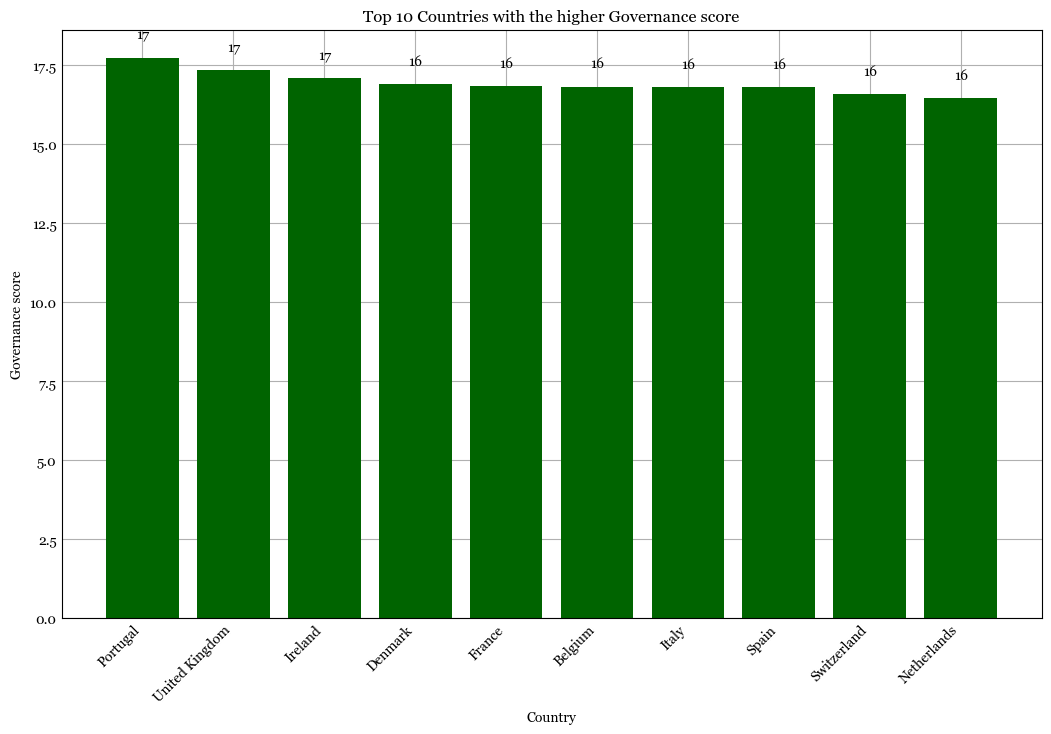

In [2318]:
# Visualizing top 10 - Governance

# Calculating top 10 countries with the higher Governance score
top_governance = bcorps_europe.groupby('Country')[
    'Subscore - Governance'
].mean().sort_values(ascending=False).head(10)


x = np.arange(len(top_governance))
y = top_governance.values

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x, y)

ax.set_xticks(x)
ax.set_xticklabels(top_governance.index, rotation=45, ha='right')

# Adding labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
            str(int(height)), ha='center', va='bottom')

# Setting axis labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Governance score')
ax.set_title('Top 10 Countries with the higher Governance score')

# Changing the color
plt.bar(x, y, color = "DarkGreen")

plt.show()

*The ‘Governance’ impact area looks at a company’s overall mission, ethics, structure, transparency, and engagement around its social and environmental impact — all very important (albeit less sexy) parts of running a better business.*

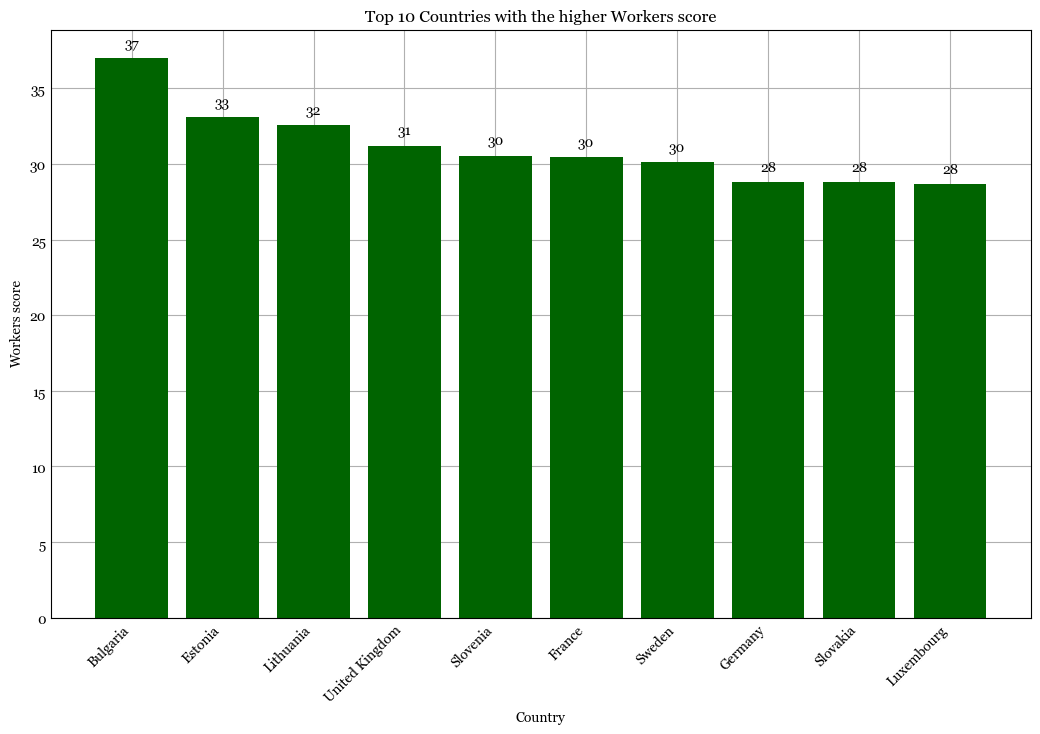

In [2319]:
# Visualizing top 10 - Workers

# Calculating top 10 countries with the higher Workers score
top_workers = bcorps_europe.groupby('Country')[
    'Subscore - Workers'
].mean().sort_values(ascending=False).head(10)

x = np.arange(len(top_workers))
y = top_workers.values

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x, y)

ax.set_xticks(x)
ax.set_xticklabels(top_workers.index, rotation=45, ha='right')

# Adding labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
            str(int(height)), ha='center', va='bottom')

# Setting axis labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Workers score')
ax.set_title('Top 10 Countries with the higher Workers score')

# Changing the color
plt.bar(x, y, color = "DarkGreen")

plt.show()

*The ‘Workers’ impact area evaluates how a company contributes to their employees financial security, health, wellbeing, safety, career development, and engagement satisfaction. Any good business knows that its employees are crucial to their success, so the BIA urges companies to ensure they are treating their employees with thoughtfulness and respect.*

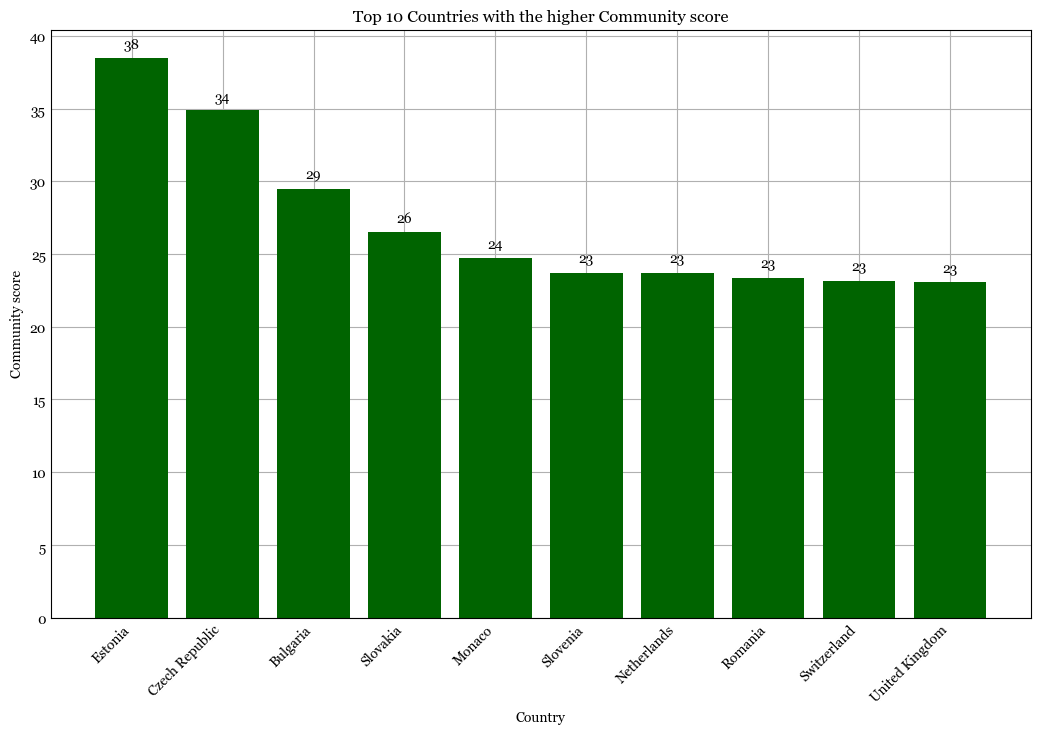

In [2320]:
# Visualizing top 10 - Community

# Calculating top 10 countries with the higher Community score
top_community = bcorps_europe.groupby('Country')[
    'Subscore - Community'
].mean().sort_values(ascending=False).head(10)

x = np.arange(len(top_community))
y = top_community.values

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x, y)

ax.set_xticks(x)
ax.set_xticklabels(top_community.index, rotation=45, ha='right')

# Adding labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
            str(int(height)), ha='center', va='bottom')

# Setting axis labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Community score')
ax.set_title('Top 10 Countries with the higher Community score')

# Changing the color
plt.bar(x, y, color = "DarkGreen")

plt.show()

*The ‘Community’ impact area looks at a business’ impact on the communities in which it operates, sources from, and hires from — essentially: its stakeholders. Points are allocated according to ‘JEDI principles’ of justice, equity, diversity, and inclusion, as well as charitable giving, supply chain management and more.*

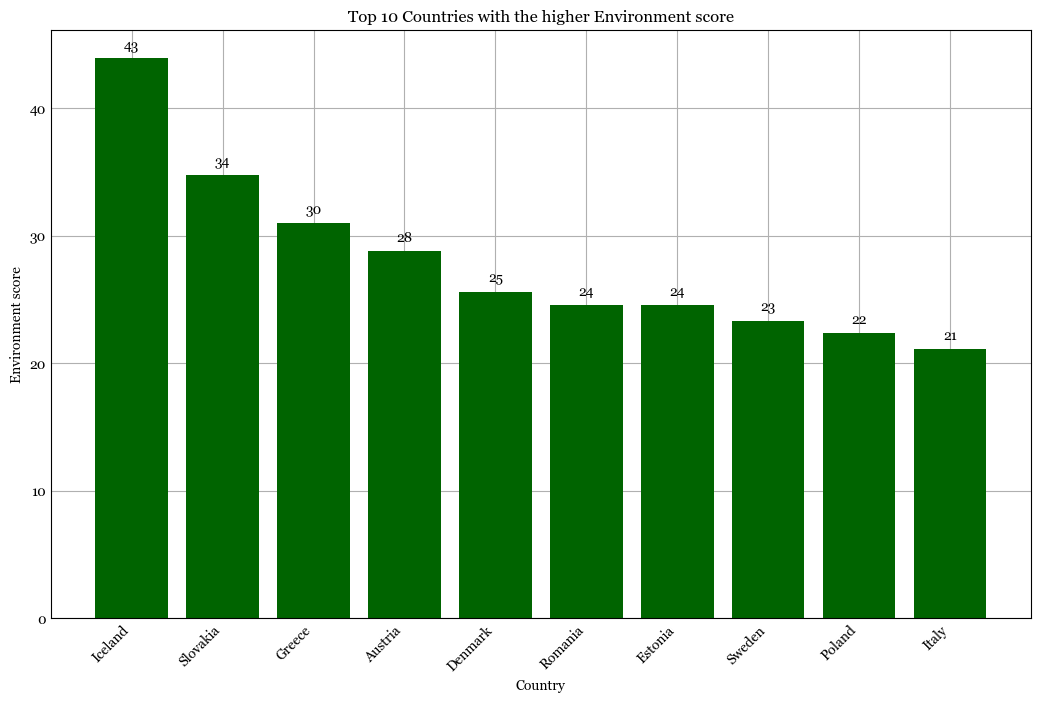

In [2321]:
# Visualizing top 10 - Environment

# Calculating top 10 countries with the higher Environment score
top_environment = bcorps_europe.groupby('Country')[
    'Subscore - Environment'
].mean().sort_values(ascending=False).head(10)

x = np.arange(len(top_environment))
y = top_environment.values

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x, y)

ax.set_xticks(x)
ax.set_xticklabels(top_environment.index, rotation=45, ha='right')

# Adding labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
            str(int(height)), ha='center', va='bottom')

# Setting axis labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Environment score')
ax.set_title('Top 10 Countries with the higher Environment score')

# Changing the color
plt.bar(x, y, color = "DarkGreen")

plt.show()

*The ‘Environment’ impact area focuses on a company’s overall environmental management practices and their impact on the air, climate, water, land and biodiversity that we all share. This impact area not only looks at a company’s direct impact on the environment, but the impact of its supply chain and distributors too.*

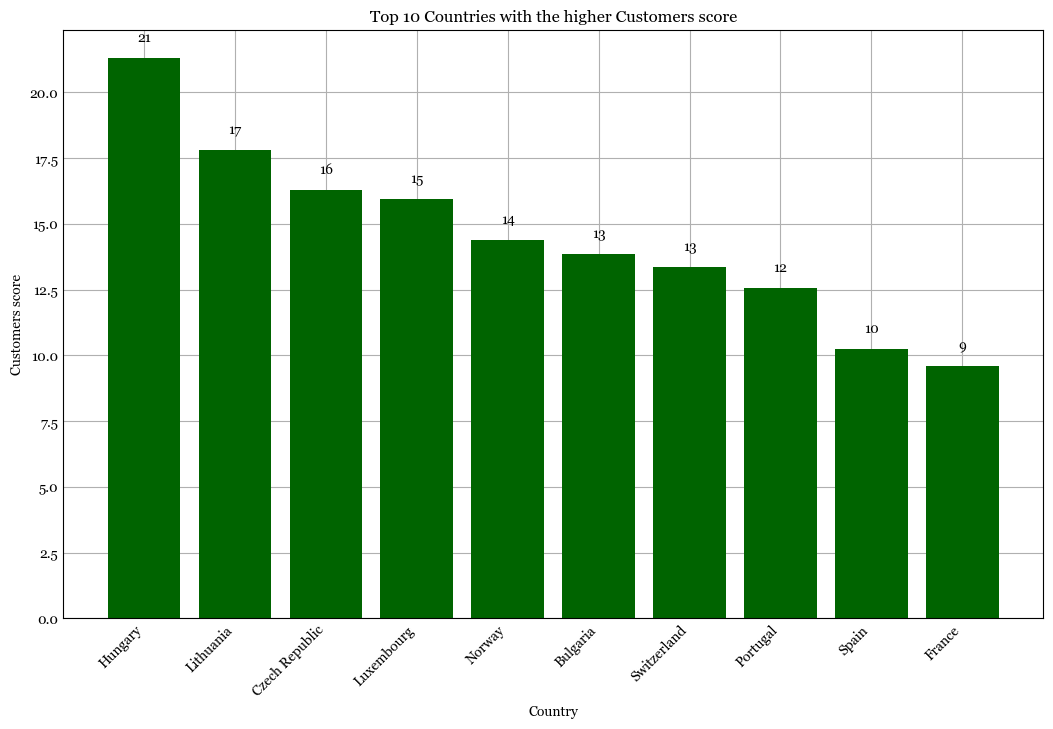

In [2322]:
# Visualizing top 10 - Customers

# Calculating top 10 countries with the higher Customers score
top_customers = bcorps_europe.groupby('Country')[
    'Subscore - Customers'
].mean().sort_values(ascending=False).head(10)

x = np.arange(len(top_customers))
y = top_customers.values

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x, y)

ax.set_xticks(x)
ax.set_xticklabels(top_customers.index, rotation=45, ha='right')

# Adding labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
            str(int(height)), ha='center', va='bottom')

# Setting axis labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Customers score')
ax.set_title('Top 10 Countries with the higher Customers score')

# Changing the color
plt.bar(x, y, color = "DarkGreen")

plt.show()

*The ‘Customers’ impact area evaluates how well a company looks after its loyal customers through the quality of its products and services, ethical marketing, data privacy and security, and opportunities for customer feedback.*

## **France** ##

In [2323]:
# Visualizing B Corps distribution in France

# Extracting region and country from Headquarters
bcorps['Region'] = bcorps['Headquarters'].str.split(',').str[0].str.strip()
bcorps['Country'] = bcorps['Headquarters'].str.split(',').str[1].str.strip()

# Filtering for France and group by Region
france_data = bcorps[bcorps['Country'] == 'France']
france_grouped = france_data.groupby('Region').size().reset_index(name='industry_count')

# Loading French regions GeoJSON
import json
with open('regions.geojson') as f:
    france_geojson = json.load(f)

fig = px.choropleth(
    france_grouped,
    geojson=france_geojson,
    locations='Region',
    featureidkey='properties.nom',
    color='industry_count',
    color_continuous_scale="Greens",
    scope="europe",
    hover_name='Region',
    title='B Corps Distribution in France by Region'
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

*Maybe a discrepancy between my dataframe and geojson file, let's dig in*

In [2324]:
# Visualizing the naming in my dataframe

print(france_grouped['Region'].unique())


['Alsace' 'Aquitaine' 'Auvergne' 'Auvergne-Rhône-Alpes'
 'Bourgogne-Franche-Comté' 'Brittany' 'Burgundy' 'Centre-Val de Loire'
 'Champagne-Ardenne' 'Grand Est' 'Hauts-de-France' 'Languedoc-Roussillon'
 'Lorraine' 'Lower Normandy' 'Martinique' 'Nord-Pas-de-Calais' 'Normandy'
 'Nouvelle-Aquitaine' 'Occitania' 'Paris' 'Pays de la Loire'
 'Poitou-Charentes' "Provence-Alpes-Côte d'Azur" 'Rhône-Alpes'
 'Upper Normandy' 'Île-de-France']


In [2325]:
# Visualizing the naming in geojson file

for feature in france_geojson['features']:
    print(feature['properties'])

{'code': '11', 'nom': 'Île-de-France'}
{'code': '24', 'nom': 'Centre-Val de Loire'}
{'code': '27', 'nom': 'Bourgogne-Franche-Comté'}
{'code': '28', 'nom': 'Normandie'}
{'code': '32', 'nom': 'Hauts-de-France'}
{'code': '44', 'nom': 'Grand Est'}
{'code': '52', 'nom': 'Pays de la Loire'}
{'code': '53', 'nom': 'Bretagne'}
{'code': '75', 'nom': 'Nouvelle-Aquitaine'}
{'code': '01', 'nom': 'Guadeloupe'}
{'code': '02', 'nom': 'Martinique'}
{'code': '03', 'nom': 'Guyane'}
{'code': '04', 'nom': 'La Réunion'}
{'code': '06', 'nom': 'Mayotte'}
{'code': '76', 'nom': 'Occitanie'}
{'code': '84', 'nom': 'Auvergne-Rhône-Alpes'}
{'code': '93', 'nom': "Provence-Alpes-Côte d'Azur"}
{'code': '94', 'nom': 'Corse'}


In [2326]:
# Applying corrections in my dataframe

corrections = {
    "Alsace": "Grand Est",
    "Aquitaine": "Nouvelle-Aquitaine",
    "Auvergne": "Auvergne-Rhône-Alpes",
    "Brittany": "Bretagne",
    "Burgundy": "Bourgogne-Franche-Comté",
    "Champagne-Ardenne": "Grand Est",
    "Languedoc-Roussillon": "Occitanie",
    "Lorraine": "Grand Est",
    "Lower Normandy": "Normandie",
    "Nord-Pas-de-Calais": "Hauts-de-France",
    "Normandy": "Normandie",
    "Occitania": "Occitanie",
    "Paris": "Île-de-France",
    "Poitou-Charentes": "Nouvelle-Aquitaine",
    "Rhône-Alpes": "Auvergne-Rhône-Alpes",
    "Upper Normandy": "Normandie"
}

france_grouped['Region'] = france_grouped['Region'].replace(corrections)

In [2327]:
# ensure that each region appears only once with the correct total value

france_grouped = france_grouped.groupby('Region')['industry_count'].sum().reset_index()


In [2328]:
# Visualizing the distribution of B Corps in France

# Calculating the percentage of B Corps per region
france_grouped['percent_total'] = (
    france_grouped['industry_count'] / france_grouped['industry_count'].sum() * 100
).round(2)  # round to two decimal places

fig = px.choropleth(
    france_grouped,
    geojson=france_geojson,
    locations='Region',
    featureidkey='properties.nom',
    color='industry_count',
    color_continuous_scale='Greens',
    scope='europe',
    hover_name='Region',
    custom_data=['percent_total'],  # pass the percent_total column for custom hover data
    title='B Corps Distribution in France by Region',
    hover_data={'Region': False, 'industry_count': True}  # show industry_count but hide region duplicate
)

# Customizing the hover tooltip template
fig.update_traces(
    hovertemplate='<b>%{location}</b><br>Industry Count: %{z}<br>Percent Total: %{customdata[0]:.2f}%<extra></extra>'
)

# Adjusting geographic layout to fit the map's bounds and hide default geographic features
fig.update_geos(fitbounds="locations", visible=False)


fig.show()

*In France, Île-de-France and Paris dominate the B Corp concentration, representing over 60% of certified companies, revealing urban centers as hubs of responsible business activity.*

In [2329]:
# Visualizing the distribution using a pie chart

fig = px.pie(france_grouped,
             values='industry_count',
             names='Region',
             color_discrete_sequence=px.colors.sequential.Greens_r)

fig.update_layout(
    width=1100,
    height=750,
    font_family="Georgia")

fig.show()

In [2330]:
# Exports: visualizing share of companies that export within the EU or internationally


# Filtering bcorps DataFrame for France rows and creating a copy
bcorps_france = bcorps.loc[bcorps['Country'] == 'France'].copy()

# Splitting the 'Operates In' column strings into lists of countries
bcorps_france.loc[:, 'Operates_list'] = bcorps_france['Operates In'].str.split(', ')

# Defining a set of European countries for the classification
european_countries = set([
   "France", "Germany", "Italy", "Spain", "United Kingdom", "Netherlands",
    "Belgium", "Sweden", "Norway", "Denmark", "Finland", "Poland", "Portugal",
    "Greece", "Austria", "Ireland", "Czech Republic", "Hungary", "Switzerland",
    "Slovakia", "Slovenia", "Croatia", "Estonia", "Latvia", "Lithuania", "Bulgaria",
    "Iceland", "Denmark", "Switzerland", "Luxembourg", "Ireland", "Norway", "Monaco",
    "Sweden", "Romania"])

# Defining a function to classify the operating category based on countries list
def classify_operates(pays):
    if pays == ["France"]:
        return "Only France"
    elif all(p in european_countries for p in pays):
        return "Only Europe"
    else:
        return "International"

# Applying the classification function on the 'Operates_list' column using .loc to avoid warnings
bcorps_france.loc[:, 'Operating Category'] = bcorps_france['Operates_list'].apply(classify_operates)

# Counting number of occurrences of each operating category
category_counts = bcorps_france['Operating Category'].value_counts().reset_index()
category_counts.columns = ['Operating Category', 'Count']

fig = px.pie(category_counts,
             values='Count',
             names='Operating Category',
             title='Exports',
             color_discrete_sequence=px.colors.sequential.Greens_r)

fig.update_layout(
    width=1100,
    height=750,
    font_family="Georgia")

fig.show()


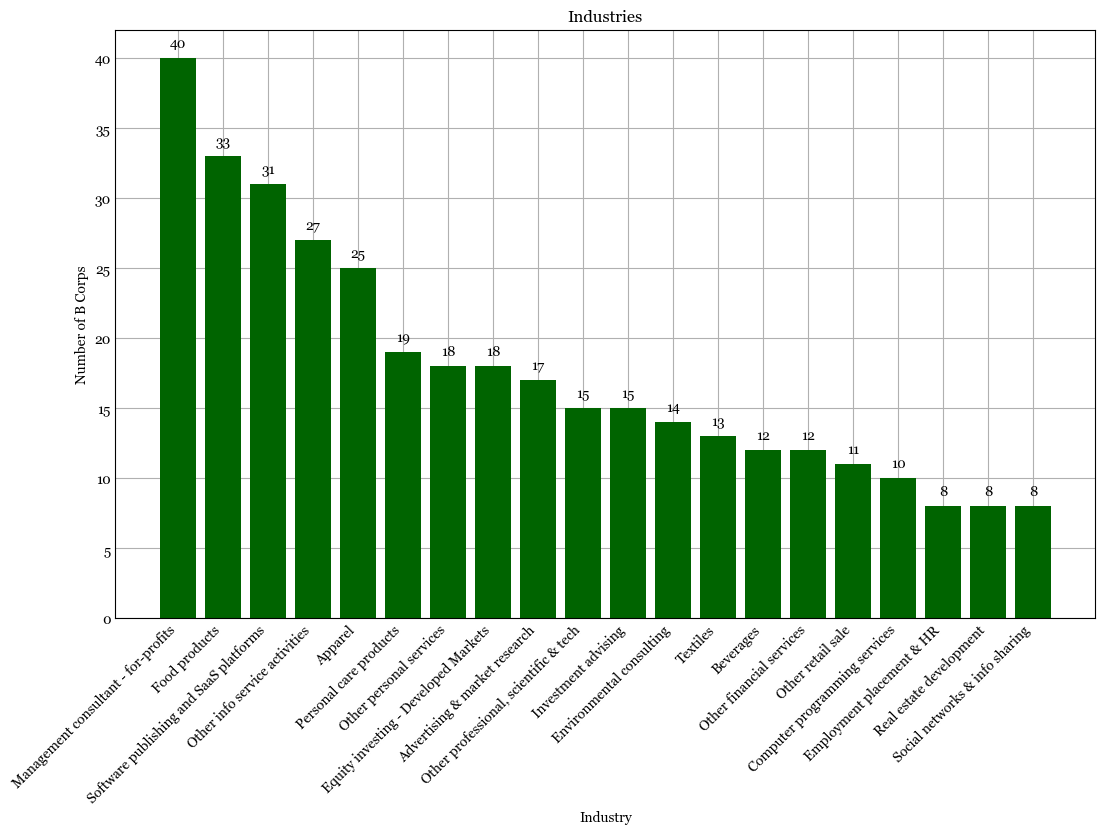

In [2331]:

# Visualizing industries

industries = bcorps_france.groupby('Industry').size().sort_values(ascending=False).head(20)

x = np.arange(len(industries))
y = industries.values

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x, y)

ax.set_xticks(x)
ax.set_xticklabels(industries.index, rotation=45, ha='right')

# Adding labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
            str(int(height)), ha='center', va='bottom')

# Set axis labels and title
ax.set_xlabel('Industry')
ax.set_ylabel('Number of B Corps')
ax.set_title('Industries')

# Changing the color
plt.bar(x, y, color = "DarkGreen")

plt.show()

In [2332]:
# Visualizing the distribution using a pie chart


# Count number of occurrences of each operating category
industry_counts = bcorps_france['Industry'].value_counts().head(20).reset_index()
industry_counts.columns = ['Industry', 'Count']

fig = px.pie(industry_counts,
             values='Count',
             names='Industry',
             title='Distribution by Industry',
             color_discrete_sequence=px.colors.sequential.Greens_r)

fig.update_layout(
    width=1100,
    height=750,
    font_family="Georgia")

fig.show()

In [2333]:
# Visualizing the top 10 companies by score


# Sorting the DataFrame descending by "Overall B Impact Score",
# taking the top 10 companies, and resetting the index
bcorps_france = bcorps_france.sort_values(
    by="Overall B Impact Score", ascending=False).head(10).reset_index(drop=True)

# List of subscore columns to plot
subscore_columns = [
    "Subscore - Governance",
    "Subscore - Workers",
    "Subscore - Community",
    "Subscore - Environment",
    "Subscore - Customers"
]

# Calculating total score by summing the subscore columns for each company
bcorps_france['Total'] = bcorps_france[subscore_columns].sum(axis=1)


colors = {
    "Subscore - Governance": "#69a74e",
    "Subscore - Workers": "#284e13",
    "Subscore - Community": "#38761d",
    "Subscore - Environment": "#0bb50d",
    "Subscore - Customers": "#93c47d"
}

legend_names = {
    "Subscore - Governance": "Governance",
    "Subscore - Workers": "Workers",
    "Subscore - Community": "Community",
    "Subscore - Environment": "Environment",
    "Subscore - Customers": "Customers"
}

fig = go.Figure()

# Adding a bar trace for each subscore
for col in subscore_columns:
    fig.add_trace(go.Bar(
        x=bcorps_france["Name"],  # Company names on the x-axis
        y=bcorps_france[col],     # Subscore values on the y-axis
        name=legend_names[col],    
        marker=dict(color=colors[col])
    ))

# Adding annotations
for i, row in bcorps_france.iterrows():
    fig.add_annotation(
        x=row['Name'],
        y=row['Total'],
        text=f"{row['Total']:.0f}",
        showarrow=False,
        yshift=10,
        font=dict(family="Georgia")
    )

fig.update_layout(
    width=1100,
    height=750,
    barmode='stack',
    title='Top 10 companies by score',
    xaxis_title='Company Name',
    yaxis_title='Subscore Value',
    xaxis_tickangle=-45,
    font=dict(family="Georgia"),
)

fig.update_traces(
    hovertemplate='%{x}: %{y:.0f} <extra></extra>'
)

fig.show()

*The top French companies achieve impact scores well above average, especially in Governance and Workers, illustrating exemplary corporate responsibility practices.*

In [2334]:
# Visualizing distribution by sector


# Filtering the original dataframe to keep only companies operating in France
bcorps_france = bcorps[bcorps['Country'] == 'France'].copy()

# Calculating sector counts and percentages
sector_counts = bcorps_france['Sector'].value_counts()
sector_percentages = 100 * sector_counts / sector_counts.sum()
sector_percentages = sector_percentages.round(2)  # round to 2 decimal places

# Mapping sectors to numeric indices for coloring
unique_sectors = sector_percentages.index.tolist()
sector_color_indices = [unique_sectors.index(s) for s in sector_percentages.index]

fig = go.Figure(data=[go.Scatter(
    x=sector_percentages.index,
    y=sector_percentages.values,
    mode='markers',
    marker=dict(
        size=sector_percentages.values * 3,
        color=sector_color_indices,
        colorscale='Greens_r',
        showscale=True,
        colorbar=dict(title='Sector Index')
    )
)])

fig.update_layout(
    xaxis=dict(title='Sector', showgrid=False),
    yaxis=dict(title='Percentage (%)', showgrid=False),
    font=dict(family="Georgia", color="white"),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    width=900,
    height=600
)

fig.update_traces(
    hovertemplate='%{x}: %{y:.2f} %<extra></extra>'
)

fig.show()

## Conclusions ##

This dataset breaks down the spread of B Corps by country, industry, and region. It also gives impact scores in five areas: Governance, Workers, Community, Environment and Customers, and the links between the amount of B Corps and GDP per capita and CO2 emissions. The data points out where B Corps are most and least common by country, the different industries they're in, and how they're spread out across regions in France.


Here are some key things we found:

- The UK and the US have the most B Corps, with France and other European countries behind them;

- Most B Corps worldwide are in the Service with Minor Environmental Footprint sector;

- My analysis finds a slight connection between the amount of B Corps and GDP per capita (around 0.30), plus CO2 emissions per capita (around 0.32);

- In France, Île-de-France and Paris have the highest amount of B Corps compared to other regions.


*This research was done in September 2025, using the data and certifications up to that point.*